# Practice Case Big Data Tools - DVD Rental

## Problem Statement
1.	Compare the total replacement costs among movie ratings
2.	Provide 5 most-rented movie genres
3.	Find out the countries that rent the most
4.	Provide cities in the country with the highest number of rents (Q3), that pay the highest replacement cost  

### Q1. Compare the total replacement costs among movie ratings

To work on this problem, we will need the "Film" table

In [359]:
#Importing pandas library and the dataset
import pandas as pd
film = pd.read_csv("gs://dvdrentalmw01/film_202103101815.csv")

In [360]:
#Data profiling
film

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58,{Behind the Scenes},'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58,{Trailers},'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58,{Trailers},'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58,"{Trailers,Behind the Scenes}",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58,"{Trailers,Behind the Scenes}",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58,{Deleted Scenes},'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58,"{Trailers,Deleted Scenes}",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [361]:
#Checking duplicates
film = film.drop_duplicates()

In [362]:
film

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58,{Behind the Scenes},'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58,{Trailers},'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58,{Trailers},'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58,"{Trailers,Behind the Scenes}",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58,"{Trailers,Behind the Scenes}",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58,{Deleted Scenes},'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58,"{Trailers,Deleted Scenes}",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [363]:
#Checking data types
film.dtypes

film_id               int64
title                object
description          object
release_year          int64
language_id           int64
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
last_update          object
special_features     object
fulltext             object
dtype: object

In [364]:
#Checking missing values
print(film.isna().sum())

film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
last_update         0
special_features    0
fulltext            0
dtype: int64


Overall, the data set seems clean. We will use the variable "replacement_cost". Therefore, we will check for outliers.

<AxesSubplot:xlabel='replacement_cost'>

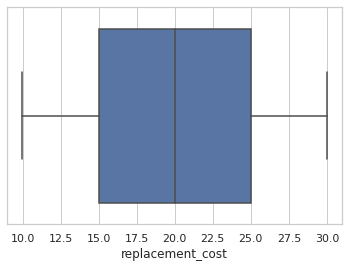

In [365]:
#Checking outliers in replacement_cost through visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.boxplot(x=film['replacement_cost'])

No outlier or strange values are observed. We can therefore proceed to the analysis and visualization.

In [366]:
#Compare total replacement costs among movie ratings

repcost = pd.DataFrame(film.groupby('rating')[['replacement_cost']].sum().\
                            sort_values('replacement_cost',ascending=False).reset_index())

In [367]:
repcost

,rating,replacement_cost
0,PG-13,4549.77
1,NC-17,4228.90
2,R,3945.05
3,PG,3678.06
4,G,3582.22


Text(0, 0.5, 'Replacement Cost')

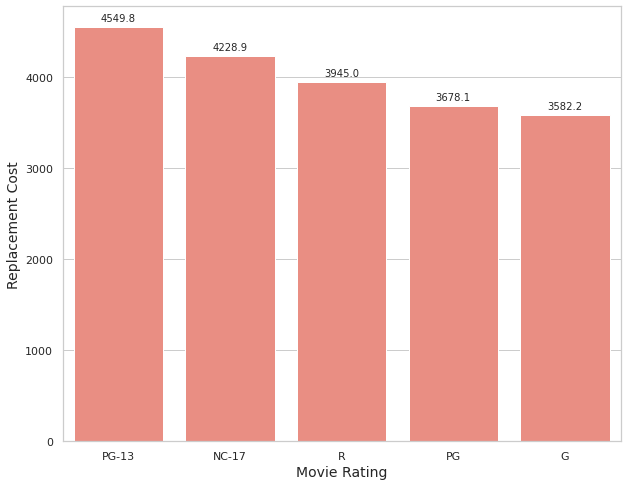

In [368]:
plt.figure(figsize=(10, 8))
splot=sns.barplot(x="rating",y="replacement_cost",data=repcost, color="salmon")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Movie Rating", size=14)
plt.ylabel("Replacement Cost", size=14)

**Conclusion**: PG-13 movies have the highest replacement cost, while G-rated movies have the lowest replacement cost.  

### Q2. Provide 5 most-rented movie genres

To solve this problem, we will need the following tables.
1. category
2. film_category
3. film
4. inventory
5. rental

The number of rentals will be based on "rental_id" in the "rental" table

In [369]:
category = pd.read_csv("gs://dvdrentalmw01/category_202103101821.csv")
film_category = pd.read_csv("gs://dvdrentalmw01/film_category_202103101823.csv")
film = pd.read_csv("gs://dvdrentalmw01/film_202103101815.csv")
inventory = pd.read_csv("gs://dvdrentalmw01/inventory_202103101824.csv")
rental = pd.read_csv("gs://dvdrentalmw01/rental_202103101824.csv")

In [370]:
#Data Profiling
category

,category_id,name,last_update
0,1,Action,2006-02-15 09:46:27
1,2,Animation,2006-02-15 09:46:27
2,3,Children,2006-02-15 09:46:27
3,4,Classics,2006-02-15 09:46:27
4,5,Comedy,2006-02-15 09:46:27
5,6,Documentary,2006-02-15 09:46:27
6,7,Drama,2006-02-15 09:46:27
7,8,Family,2006-02-15 09:46:27
8,9,Foreign,2006-02-15 09:46:27
9,10,Games,2006-02-15 09:46:27


In [371]:
film_category

,film_id,category_id,last_update
0,1,6,2006-02-15 10:07:09
1,2,11,2006-02-15 10:07:09
2,3,6,2006-02-15 10:07:09
3,4,11,2006-02-15 10:07:09
4,5,8,2006-02-15 10:07:09
...,...,...,...
995,996,6,2006-02-15 10:07:09
996,997,12,2006-02-15 10:07:09
997,998,11,2006-02-15 10:07:09
998,999,3,2006-02-15 10:07:09


In [372]:
film

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58,{Behind the Scenes},'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58,{Trailers},'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58,{Trailers},'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58,"{Deleted Scenes,Behind the Scenes}",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58,"{Trailers,Behind the Scenes}",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58,"{Trailers,Behind the Scenes}",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58,{Deleted Scenes},'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58,"{Trailers,Deleted Scenes}",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [373]:
inventory

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 10:09:17
1,2,1,1,2006-02-15 10:09:17
2,3,1,1,2006-02-15 10:09:17
3,4,1,1,2006-02-15 10:09:17
4,5,1,2,2006-02-15 10:09:17
...,...,...,...,...
4576,4577,1000,1,2006-02-15 10:09:17
4577,4578,1000,2,2006-02-15 10:09:17
4578,4579,1000,2,2006-02-15 10:09:17
4579,4580,1000,2,2006-02-15 10:09:17


In [374]:
rental

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-16 02:30:53
1,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-16 02:30:53
2,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-16 02:30:53
3,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-16 02:30:53
4,6,2005-05-24 23:08:07,2792,549,2005-05-27 01:32:07,1,2006-02-16 02:30:53
...,...,...,...,...,...,...,...
16039,16046,2005-08-23 22:26:47,4364,74,2005-08-27 18:02:47,2,2006-02-16 02:30:53
16040,16047,2005-08-23 22:42:48,2088,114,2005-08-25 02:48:48,2,2006-02-16 02:30:53
16041,16048,2005-08-23 22:43:07,2019,103,2005-08-31 21:33:07,1,2006-02-16 02:30:53
16042,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-16 02:30:53


In [375]:
#Cheking duplicates
category = category.drop_duplicates()
film_category = film_category.drop_duplicates()
film = film.drop_duplicates()
inventory = inventory.drop_duplicates()
rental = rental.drop_duplicates()

In [376]:
#Checking missing values
print(category.isna().sum())

category_id    0
name           0
last_update    0
dtype: int64


In [377]:
print(film_category.isna().sum())

film_id        0
category_id    0
last_update    0
dtype: int64


In [378]:
print(inventory.isna().sum())

inventory_id    0
film_id         0
store_id        0
last_update     0
dtype: int64


In [379]:
print(rental.isna().sum())

rental_id         0
rental_date       0
inventory_id      0
customer_id       0
return_date     183
staff_id          0
last_update       0
dtype: int64


In [380]:
rental[rental.isna().any(axis=1)]

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
11490,11496,2006-02-14 15:16:03,2047,155,NaN,1,2006-02-16 02:30:53
11535,11541,2006-02-14 15:16:03,2026,335,NaN,1,2006-02-16 02:30:53
11556,12101,2006-02-14 15:16:03,1556,479,NaN,1,2006-02-16 02:30:53
11558,11563,2006-02-14 15:16:03,1545,83,NaN,1,2006-02-16 02:30:53
11572,11577,2006-02-14 15:16:03,4106,219,NaN,2,2006-02-16 02:30:53
...,...,...,...,...,...,...,...
15855,15862,2006-02-14 15:16:03,925,215,NaN,1,2006-02-16 02:30:53
15860,15867,2006-02-14 15:16:03,837,505,NaN,2,2006-02-16 02:30:53
15868,15875,2006-02-14 15:16:03,3611,41,NaN,1,2006-02-16 02:30:53
15887,15894,2006-02-14 15:16:03,4416,168,NaN,1,2006-02-16 02:30:53


Some values in return_date are missing. However, we are not going to use this variable, so the missing values will be ignored

In [381]:
#Top 5 most-rented movie genres
cat = category[['category_id','name']]
fcat = film_category[['film_id','category_id']]
fcatm = pd.merge(cat, fcat, on='category_id',how='right')
fcatm

,category_id,name,film_id
0,6,Documentary,1
1,11,Horror,2
2,6,Documentary,3
3,11,Horror,4
4,8,Family,5
...,...,...,...
995,6,Documentary,996
996,12,Music,997
997,11,Horror,998
998,3,Children,999


In [382]:
f = film[film.columns[0:10]]
fcatmm = pd.merge(fcatm, f, on='film_id',how='inner')
fcatmm

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating
0,6,Documentary,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG
1,11,Horror,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G
2,6,Documentary,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17
3,11,Horror,4,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G
4,8,Family,5,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G
...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,Documentary,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G
996,12,Music,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17
997,11,Horror,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17
998,3,Children,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R


In [383]:
inv = inventory[inventory.columns[0:3]]
invm = pd.merge(fcatmm, inv, on='film_id',how='right')
invm

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id
0,6,Documentary,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,1,1
1,6,Documentary,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2,1
2,6,Documentary,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,3,1
3,6,Documentary,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,4,1
4,6,Documentary,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,5,Comedy,1000,Zorro Ark,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,3,4.99,50,18.99,NC-17,4577,1
4577,5,Comedy,1000,Zorro Ark,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,3,4.99,50,18.99,NC-17,4578,2
4578,5,Comedy,1000,Zorro Ark,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,3,4.99,50,18.99,NC-17,4579,2
4579,5,Comedy,1000,Zorro Ark,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,3,4.99,50,18.99,NC-17,4580,2


In [384]:
ren = rental[rental.columns[0:4]]
renm = pd.merge(invm, ren, on='inventory_id',how='right')
renm

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,rental_date,customer_id
0,12,Music,333,Freaky Pocus,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,7,2.99,126,16.99,R,1525,2,2,2005-05-24 22:54:33,459
1,3,Children,373,Graduate Lord,A Lacklusture Epistle of a Girl And a A Shark ...,2006,1,7,2.99,156,14.99,G,1711,2,3,2005-05-24 23:03:39,408
2,11,Horror,535,Love Suicides,A Brilliant Panorama of a Hunter And a Explore...,2006,1,6,0.99,181,21.99,R,2452,1,4,2005-05-24 23:04:41,333
3,3,Children,450,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006,1,5,2.99,84,29.99,NC-17,2079,2,5,2005-05-24 23:05:21,222
4,5,Comedy,613,Mystic Truman,A Epic Yarn of a Teacher And a Hunter who must...,2006,1,5,0.99,92,19.99,NC-17,2792,1,6,2005-05-24 23:08:07,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,4,Classics,951,Voyage Legally,A Epic Tale of a Squirrel And a Hunter who mus...,2006,1,6,0.99,78,28.99,PG-13,4364,2,16046,2005-08-23 22:26:47,74
16040,9,Foreign,452,Illusion Amelie,A Emotional Epistle of a Boat And a Mad Scient...,2006,1,4,0.99,122,15.99,R,2088,2,16047,2005-08-23 22:42:48,114
16041,7,Drama,439,Hunchback Impossible,A Touching Yarn of a Frisbee And a Dentist who...,2006,1,4,4.99,151,28.99,PG-13,2019,1,16048,2005-08-23 22:43:07,103
16042,7,Drama,585,Mob Duffel,A Unbelieveable Documentary of a Frisbee And a...,2006,1,4,0.99,105,25.99,G,2666,2,16049,2005-08-23 22:50:12,393


In [385]:
genre_rent = renm[['name','rental_id']].groupby(['name'])['rental_id'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)

In [386]:
genre_rent

,name,count
14,Sports,1179
1,Animation,1166
0,Action,1112
13,Sci-Fi,1101
7,Family,1096


Text(0, 0.5, 'Number of Rents')

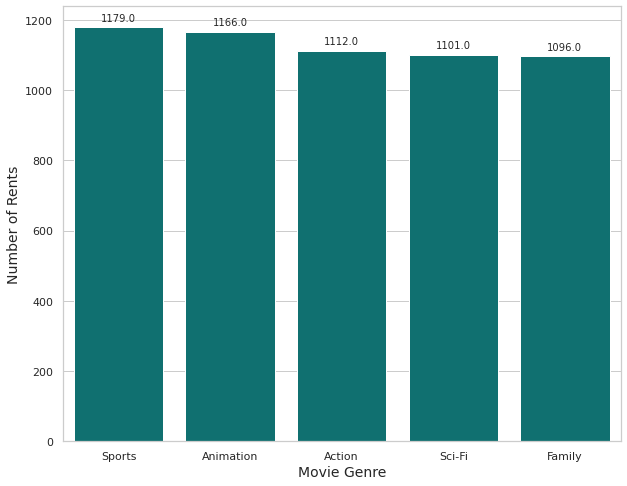

In [387]:
plt.figure(figsize=(10, 8))
splot=sns.barplot(x="name",y="count",data=genre_rent, color="teal")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Movie Genre", size=14)
plt.ylabel("Number of Rents", size=14)

**Conclusion**: The top 5 most-rented movie genres are sports, animation, action, sci-fi, and family

#### Q3. Find out the countries that rent the most

To solve this issue, we will need to use the tables that we have joined in Question #2, and join it with "customer", "address", "city", and "country"

In [388]:
cust = pd.read_csv('gs://dvdrentalmw01/customer_202103101819.csv')
address = pd.read_csv('gs://dvdrentalmw01/address_202103101821.csv')
city = pd.read_csv('gs://dvdrentalmw01/city_202103101822.csv')
country = pd.read_csv('gs://dvdrentalmw01/country_202103101822.csv')

In [389]:
custc = cust[['customer_id', 'address_id']]

In [390]:
addc = address[['address_id','city_id']]

In [391]:
cityc=city[['city_id','city','country_id']]

In [392]:
countryc=country[['country_id','country']]

In [393]:
custm = pd.merge(renm, custc, on='customer_id',how='left')

In [394]:
addm = pd.merge(custm, addc, on='address_id',how='left')

In [395]:
citym = pd.merge(addm, cityc, on='city_id',how='left')

In [396]:
countrym = pd.merge(citym, countryc, on='country_id',how='left')

In [397]:
countrym

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,...,inventory_id,store_id,rental_id,rental_date,customer_id,address_id,city_id,city,country_id,country
0,12,Music,333,Freaky Pocus,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,7,2.99,126,...,1525,2,2,2005-05-24 22:54:33,459,464,423,Qomsheh,46,Iran
1,3,Children,373,Graduate Lord,A Lacklusture Epistle of a Girl And a A Shark ...,2006,1,7,2.99,156,...,1711,2,3,2005-05-24 23:03:39,408,413,230,Jaffna,88,Sri Lanka
2,11,Horror,535,Love Suicides,A Brilliant Panorama of a Hunter And a Explore...,2006,1,6,0.99,181,...,2452,1,4,2005-05-24 23:04:41,333,338,48,Baku,10,Azerbaijan
3,3,Children,450,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006,1,5,2.99,84,...,2079,2,5,2005-05-24 23:05:21,222,226,235,Jaroslavl,80,Russian Federation
4,5,Comedy,613,Mystic Truman,A Epic Yarn of a Teacher And a Hunter who must...,2006,1,5,0.99,92,...,2792,1,6,2005-05-24 23:08:07,549,555,459,Santiago de Compostela,87,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,4,Classics,951,Voyage Legally,A Epic Tale of a Squirrel And a Hunter who mus...,2006,1,6,0.99,78,...,4364,2,16046,2005-08-23 22:26:47,74,78,431,Rio Claro,15,Brazil
16040,9,Foreign,452,Illusion Amelie,A Emotional Epistle of a Boat And a Mad Scient...,2006,1,4,0.99,122,...,2088,2,16047,2005-08-23 22:42:48,114,118,148,Duisburg,38,Germany
16041,7,Drama,439,Hunchback Impossible,A Touching Yarn of a Frisbee And a Dentist who...,2006,1,4,4.99,151,...,2019,1,16048,2005-08-23 22:43:07,103,107,220,Ilorin,69,Nigeria
16042,7,Drama,585,Mob Duffel,A Unbelieveable Documentary of a Frisbee And a...,2006,1,4,0.99,105,...,2666,2,16049,2005-08-23 22:50:12,393,398,278,Korolev,80,Russian Federation


In [398]:
country_rent = countrym[['country','rental_id']].groupby(['country'])['rental_id'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)

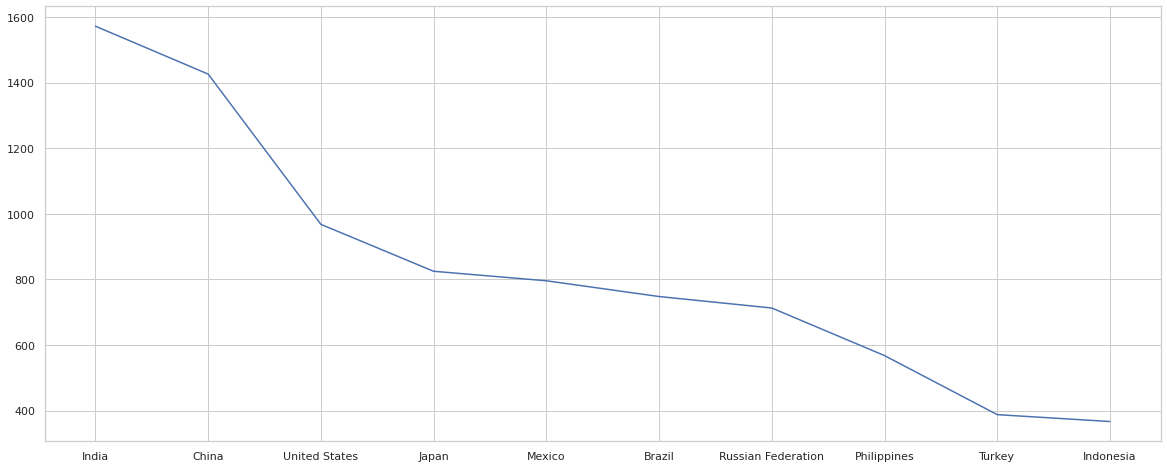

In [399]:
import matplotlib.pyplot as plt
import numpy as np

x = country_rent['country']
y = country_rent['count']

plt.figure(figsize=(20, 8))
plt.plot(x, y)
plt.show()

**Conclusion**: India is the country with the highest number of rents.

#### Q4. Provide cities in the country with the highest number of rents (Q3), that pay the highest replacement cost 

To solve this issue, we will use the tables that we have joined in Question #3, but we will use only India

In [400]:
ind = countrym[countrym.country == 'India']

In [401]:
city_rcost = ind[['city','replacement_cost']].groupby(['city'])['replacement_cost'] \
                             .sum() \
                             .reset_index(name='sum') \
                             .sort_values(['sum'], ascending=False)\
                             .head(10)

In [402]:
city_rcost

,city,sum
12,Bijapur,794.61
56,Valparai,755.65
29,Karnal,740.65
51,Siliguri (Shiliguri),694.66
1,Ahmadnagar,687.67
10,Bhopal,662.68
21,Halisahar,656.68
36,Palghat (Palakkad),639.71
54,Uluberia,639.69
39,Patiala,629.70


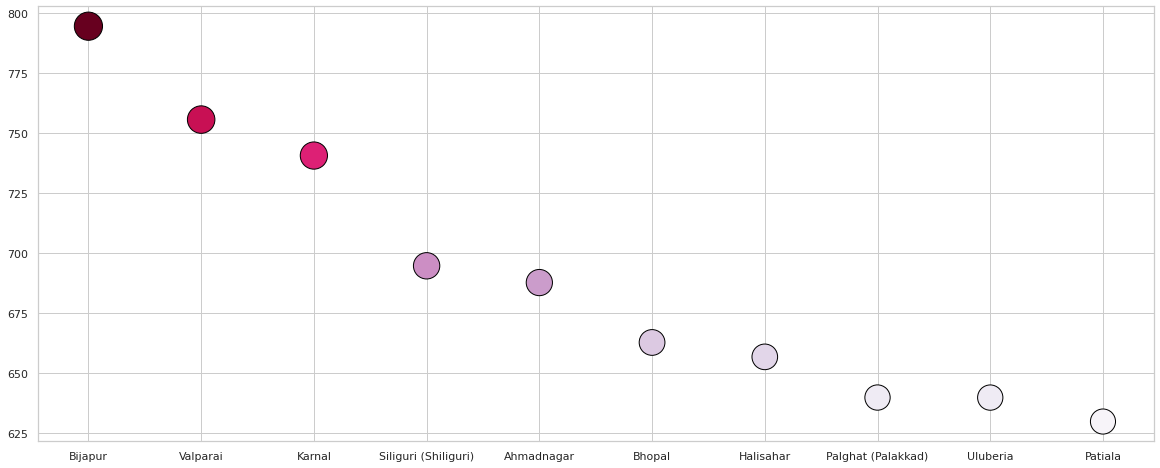

In [424]:
x = city_rcost['city']
y = city_rcost['sum']

plt.figure(figsize=(20, 8))
plt.scatter(x, y,s=city_rcost['sum'], c=city_rcost['sum'], cmap='PuRd', edgecolor='black')
plt.show()

**Conclusion**: Customers residing in Bijapur, India, pay the most replacement cost